In [2]:
import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten , Dropout


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train.reshape(-1, 28*28) / 255.0
x_test = x_test.reshape(-1, 28*28) / 255.0

In [13]:
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense

In [14]:

input_layer = Input(shape=(x_train.shape[1],))
bottleneck_layer = Dense(32, activation='relu' , name='bottleneck_layer')(input_layer)
output_layer = Dense(x_train.shape[1], activation='sigmoid')(bottleneck_layer)


In [15]:
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck_layer (Dense)        │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
encoder = Model(inputs=input_layer, outputs=bottleneck_layer)
encoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck_layer (Dense)        │ (None, 32)             │        25,120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,120 (98.12 KB)

 Trainable params: 25,120 (98.12 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
encoder_layers = Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoder_layers, outputs=decoder_layer(encoder_layers))

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


In [21]:
autoencoder.compile(optimizer='adam', loss='mse')

In [26]:
history = autoencoder.fit(x_train, x_train, epochs=20, batch_size=64,shuffle = True ,   validation_data=(x_test, x_test))


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0102 - val_loss: 0.0098
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0100 - val_loss: 0.0098
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0100 - val_loss: 0.0098
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0100 - val_loss: 0.0098
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0100 - val_loss: 0.0098
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 12/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step


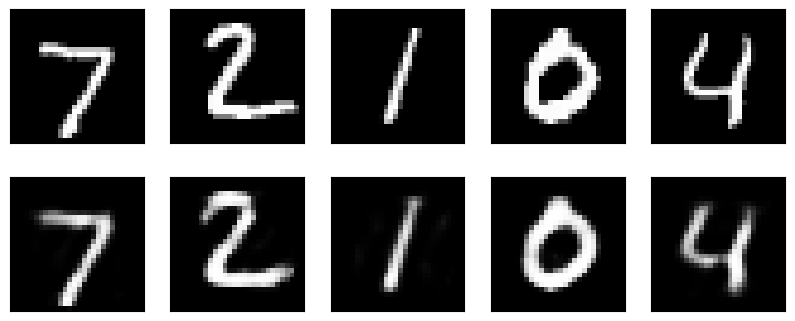

In [27]:
encoder_image  = encoder.predict(x_test)
decoder_image = decoder.predict(encoder_image)


import matplotlib.pyplot as plt
n= 5
plt.figure(figsize=(10,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoder_image[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()